### Primer Clustering con Scikit-learn

## Importar Librerias

In [3]:
from sklearn .datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=(1,1.55,2,2), random_state=7)

In [9]:
df_blobls = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y' : y
})

In [11]:
df_blobls

,x1,x2,y
0,-3.456009,5.246821,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.803484,1.514430,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.530741,1.713384,1
98,-9.216388,6.670846,0


In [29]:
def plot_2d_clusters(x,y,ax):
  y_uniques = pd.Series(y).unique()

  for _ in y_uniques:
    x[y==_].plot(
        title=f'{len(y_uniques)}Clusters',
        kind='scatter',
        x='x1',
        y='x2',
        marker=f'${_}$',
        ax = ax
    )

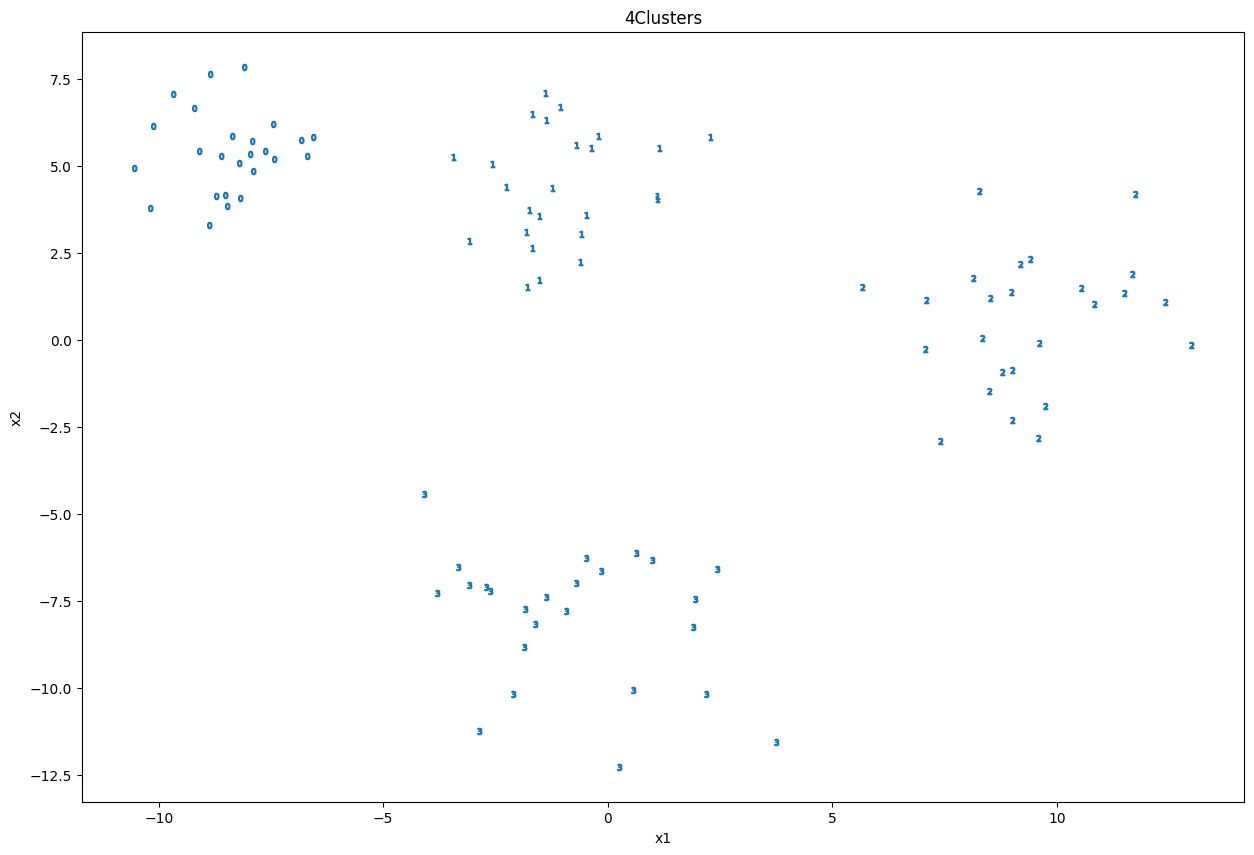

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobls[['x1','x2']], df_blobls['y']
plot_2d_clusters(x,y,ax)

## Aplicando clustering

In [31]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=4, random_state=7)

In [37]:
y_pred =  kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
y_pred

array([3, 2, 0, 3, 0, 3, 2, 1, 0, 2, 2, 1, 2, 0, 3, 2, 2, 1, 2, 0, 3, 0,
       0, 2, 1, 0, 1, 1, 2, 3, 2, 2, 3, 2, 2, 0, 1, 0, 3, 0, 2, 3, 3, 1,
       3, 1, 0, 0, 1, 0, 1, 2, 1, 2, 3, 0, 3, 2, 3, 3, 3, 2, 3, 1, 0, 1,
       0, 1, 1, 3, 0, 1, 0, 0, 1, 1, 1, 1, 2, 3, 3, 3, 0, 2, 1, 2, 1, 0,
       0, 3, 2, 3, 0, 2, 1, 1, 2, 3, 0, 3], dtype=int32)

Text(0.5, 1.0, 'Kmeans 4Clusters')

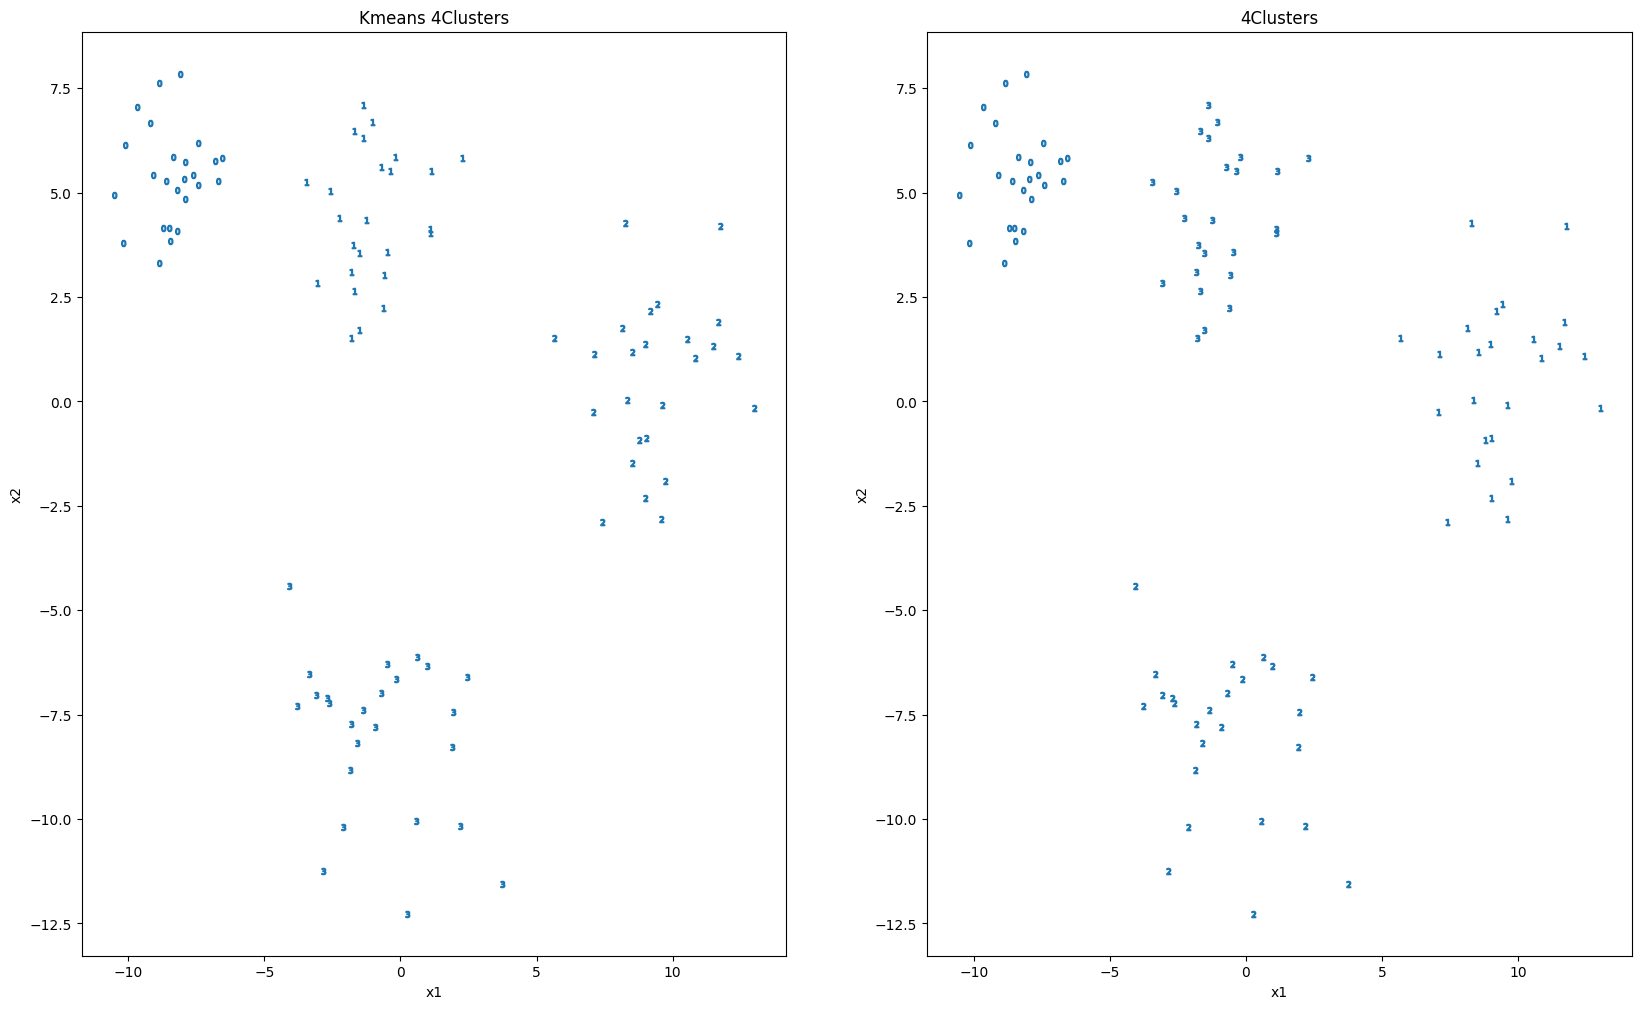

In [42]:
fig, axs = plt.subplots(1,2, figsize = (20,12))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[0].set_title(f'Kmeans {axs[1].get_title()}')